<a href="https://colab.research.google.com/github/saipranav-thota/QuantumCryptography/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx


In [ ]:
!pip install qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.6 MB/s eta 0:00:00


In [ ]:
!pip install qiskit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.7 MB/s eta 0:00:00


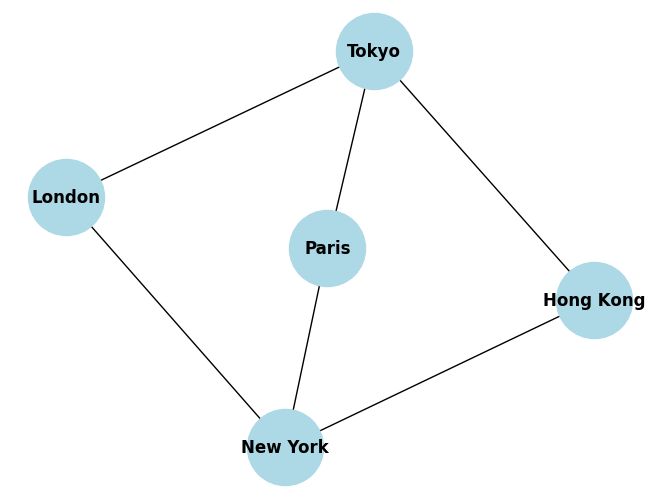

Shortest path from New York to Tokyo: ['New York', 'London', 'Tokyo']
Classical Routing Path: ['New York', 'London', 'Tokyo'] | Time Taken: 9.799003601074219e-05 seconds
Quantum Teleportation Result: {'100': 104, '110': 127, '101': 118, '111': 138, '011': 148, '000': 142, '010': 131, '001': 116} | Time Taken: 0.02560567855834961 seconds


In [ ]:

import networkx as nx
import socket
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import time

# Create a classical network topology using NetworkX
def create_network():
    G = nx.Graph()
    # Add quantum nodes representing locations
    G.add_nodes_from(["New York", "London", "Tokyo", "Paris", "Hong Kong"])
    # Add edges representing connections between nodes
    G.add_edges_from([("New York", "London"),
                      ("New York", "Paris"),
                      ("London", "Tokyo"),
                      ("Paris", "Tokyo"),
                      ("Tokyo", "Hong Kong"),
                      ("Hong Kong", "New York")])

    return G

# Visualize the network
def visualize_network(G):
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')
    plt.show()

# Find the shortest path between two quantum nodes using Dijkstra's algorithm
def find_shortest_path(G, source, target):
    return nx.dijkstra_path(G, source, target)

# Function to create quantum entanglement between two qubits
def create_entanglement():
    qc = QuantumCircuit(2)
    qc.h(0)  # Create superposition on qubit 0
    qc.cx(0, 1)  # Entangle qubit 0 and qubit 1
    qc.measure_all()  # Measure both qubits
    return qc

# Simulate entanglement
def simulate_entanglement():
    backend = Aer.get_backend('qasm_simulator')
    qc_ent = create_entanglement()
    tqc_ent = transpile(qc_ent, backend)
    qobj = execute(tqc_ent, backend)
    result = qobj.result()
    counts = result.get_counts()
    plot_histogram(counts).show()

# Function for quantum teleportation between two nodes
def quantum_teleportation():
    qc = QuantumCircuit(3, 3)

    # Step 1: Prepare qubit 0 (message qubit) in an arbitrary state
    qc.h(0)  # Put qubit 0 in superposition (example)

    # Step 2: Entangle qubit 1 and qubit 2
    qc.h(1)
    qc.cx(1, 2)

    # Step 3: Bell measurement on qubits 0 and 1
    qc.cx(0, 1)
    qc.h(0)

    # Step 4: Measure qubits 0 and 1
    qc.measure([0, 1], [0, 1])

    # Step 5: Conditional operations on qubit 2 based on measurement outcomes
    qc.x(2).c_if(0, 1)  # Apply X gate if the first bit is 1
    qc.z(2).c_if(1, 1)  # Apply Z gate if the second bit is 1

    # Measure final state of qubit 2
    qc.measure(2, 2)

    # Simulate the teleportation circuit
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1024).result()
    counts = result.get_counts()

    return counts

# Simulate quantum teleportation and show results
def simulate_teleportation():
    counts = quantum_teleportation()
    plot_histogram(counts).show()

# Simulate a server (quantum node) handling classical communication
def start_server(host='localhost', port=65432):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((host, port))
        s.listen()
        print(f"Server started at {host}:{port}")
        conn, addr = s.accept()
        with conn:
            print(f"Connected by {addr}")
            while True:
                data = conn.recv(1024)
                if not data:
                    break
                print(f"Received: {data.decode()}")
                conn.sendall(b'Acknowledged')

# Simulate a client (another quantum node) requesting information
def start_client(host='localhost', port=65432, message="Control Info"):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect((host, port))
        s.sendall(message.encode())
        data = s.recv(1024)
    print(f"Received: {data.decode()}")

# -------------------------- Latency and Efficiency ---------------------------

# Compare classical routing and quantum teleportation latencies
def compare_latency(G, source, target):
    # Measure latency for classical routing
    start_time = time.time()
    path = find_shortest_path(G, source, target)
    end_time = time.time()
    print(f"Classical Routing Path: {path} | Time Taken: {end_time - start_time} seconds")

    # Measure latency for quantum teleportation
    start_time = time.time()
    teleportation_result = quantum_teleportation()
    end_time = time.time()
    print(f"Quantum Teleportation Result: {teleportation_result} | Time Taken: {end_time - start_time} seconds")


if __name__ == "__main__":
    # Step 1: Create and visualize the quantum network
    G = create_network()
    visualize_network(G)

    # Step 2: Find the shortest path between two nodes (Classical Routing)
    source = "New York"
    target = "Tokyo"
    path = find_shortest_path(G, source, target)
    print(f"Shortest path from {source} to {target}: {path}")

    # Step 3: Simulate quantum entanglement and teleportation
    simulate_entanglement()
    simulate_teleportation()

    # Step 4: Start the server and client for classical communication
    # Note: Run the server and client separately in different instances/terminals
    # To start the server:
    # start_server()

    # To start the client:
    # start_client(message="Request for Quantum Entanglement")

    # Step 5: Compare the latency of classical and quantum communication
    compare_latency(G, source, target)


In [ ]:
from qiskit import Aer, QuantumCircuit, execute, transpile


ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.10/dist-packages/qiskit/__init__.py)

In [ ]:
# Uninstall Qiskit completely
!pip uninstall qiskit qiskit-aer -y

# Reinstall Qiskit and the Aer package
!pip install qiskit qiskit-aer


Found existing installation: qiskit 1.2.4
Uninstalling qiskit-1.2.4:
  Successfully uninstalled qiskit-1.2.4
Found existing installation: qiskit-aer 0.15.1
Uninstalling qiskit-aer-0.15.1:
  Successfully uninstalled qiskit-aer-0.15.1
  Using cached qiskit-1.2.4-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
Using cached qiskit-1.2.4-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
Using cached qiskit_aer-0.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)


In [ ]:
from qiskit import Aer, QuantumCircuit, execute, transpile
from qiskit.visualization import plot_histogram


ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.10/dist-packages/qiskit/__init__.py)

In [ ]:
from qiskit import Aer, QuantumCircuit, execute, transpile
from qiskit.visualization import plot_histogram


In [ ]:
# Uninstall Qiskit and qiskit-aer first
!pip uninstall qiskit qiskit-aer -y

# Install specific versions of Qiskit and Qiskit-Aer
!pip install qiskit==0.38.0
!pip install qiskit-aer==0.38.0


Found existing installation: qiskit 1.2.4
Uninstalling qiskit-1.2.4:
  Successfully uninstalled qiskit-1.2.4
Found existing installation: qiskit-aer 0.15.1
Uninstalling qiskit-aer-0.15.1:
  Successfully uninstalled qiskit-aer-0.15.1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.7/929.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.5/167.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.7 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.38.0-py3-none-any.whl size=12123 sha256=c75a0d6e2faf99c63c287d04fd87617c4a17c4fa5fdaabeb3631b689afe9fc95
  Stored in direc

ERROR: Could not find a version that satisfies the requirement qiskit-aer==0.38.0 (from versions: 0.1.0, 0.2.0, 0.2.1, 0.2.2, 0.2.3, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.4.0, 0.4.1, 0.5.0, 0.5.1, 0.5.2, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.7.6, 0.8.0, 0.8.1, 0.8.2, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.10.2, 0.10.3, 0.10.4, 0.11.0, 0.11.1, 0.11.2, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0.1, 0.14.1, 0.14.2, 0.15.0, 0.15.1)
ERROR: No matching distribution found for qiskit-aer==0.38.0
